#[Sri Lanka Vehicle Prices Dataset](https://www.kaggle.com/datasets/lasaljaywardena/sri-lanka-vehicle-prices-dataset)

El presente trabajo es un análisis en base a un dataset que contiene el registro de ofertas sobre vehículos en el país de Sri Lanka, en la región de Ásia del Sur.
\
\
Primeramente se hacen las siguientes observaciones sobre el dataset y el porqué de su uso:
- Contiene un amplio registro de datos, con dicha cantidad es posible crear un analisis relevante para el país de Sri lanka puesto que contiene información sobre todo el país en general o las principales ciudades de dicho país.
- Su tópico es de interés general puesto que habla sobre la venta de vehículos usados lo cual ya sea para la venta de vehículos o la compra de estos es algo que a la población en general (de cualquier país) le es de interes.
- Contiene un registro reciente o actualizado sobre el precio de vehículos hasta el año 2021.
- Los parametros que contiene son lo suficientemente específicos para poder hacer el análisis requerido en los objetivos que posteriormente se plantean.
\
\
Como se puede observar en lo anteriormente dicho, la población a la que va dirigido este análisis es hacia individuos que quieran comprar un vehículo usado o que quieran vender su propio vehículo en Sri Lanka, con el fin de poder establecer un estandar del precio al que se puede ofertar dicho vehículo.
\
\
En general lo que se busca es establecer un esquema o modelo que pueda ser empleado no solo en este dataset, sino con cualquier tipo de dataset de la misma índole. Poder implementar los conocimientos adquiridos en las clases y crear evaluaciones de interes para llegar a encontrar información relevante en los datos que se están analizando.


## Definición de Objetivo
El objetivo, a largo plazo, es llegar a establecer un esquema de precios para vehículos usados en Sri Lanka, en base a características como son la marca, el año, el tipo del vehículo; así como responder preguntas de interes como:

- ¿Que carro se esta publicando más?
- ¿Como va el mercado de las camionetas?
- ¿Sera que la marca que más vende puede ser desplazada?

y poder extrapolar esta información al mercado en general.
\
\
Como primer acercamiento se establecerán las bases de factores con mayor influencia en el precio de un vehículo así como parámetros que permitan conocer el tipo de mercado que se tiene.

## Contexto Comercial
Los datos empleados para la elaboración de este análsis fueron tomados de [Sri Lanka Vehicle Prices Dataset](https://www.kaggle.com/datasets/lasaljaywardena/sri-lanka-vehicle-prices-dataset), en el año 2021, los cuales son extraidos de la plataforma de compra y venta de autos más famosa de Sri Lanka: [Ikman.lk](https://ikman.lk).
\
\
Cabe recalcar que Ikman es una plataforma no solo de venta de vehículos, sino que cualquier persona o empresa que lo desee puede publicar su anuncio de venta sobre algún producto o servicio, así como de ofertas de empleo, venta de propiedades entre otras cosas.
\
\
En resumen los datos con los que se trabaja son ofertas de venta de vehículos que gente particular, en su mayoría, ha publicado en el sitio.

## Problema Comercial
Mucha gente al querer vender un vehículo tiene las preguntas: ¿Qué precio es razonable para este vehículo? (esto aplica tanto a para comprar como vender) ¿Este vehículo se podrá vender? (en el contexto de si alguien estaría interesado en la compra de este vehículo).

En si, dadas ciertas condiciones, el precio que se le puede dar a un vehículo en venta. Para ello, lo que se buscará es determinar la tendencia en los precios de venta de los vehículos, para así poder dar un estimado del precio al que se puede ofertar un vehículo.

##Contexto Analítico
En esta parte se presentará el contenido del dataset y se depurará para poder realizar el análisis exploratorio de los datos.

Se importan las librerías que se emplearán en todo el trabajo:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

Se carga el dataset y se examinan las columnas que contiene

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Evaluaciones/Datasets/vehicle_data.csv')
df1.info()

<ipython-input-2-e0e3ed72b7cc>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/Evaluaciones/Datasets/vehicle_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123971 entries, 0 to 123970
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           123971 non-null  object
 1   Sub_title       123971 non-null  object
 2   Price           123971 non-null  object
 3   Brand           123971 non-null  object
 4   Model           123970 non-null  object
 5   Edition         47538 non-null   object
 6   Year            123971 non-null  int64 
 7   Condition       123971 non-null  object
 8   Transmission    123970 non-null  object
 9   Body            118876 non-null  object
 10  Fuel            123971 non-null  object
 11  Capacity        123766 non-null  object
 12  Mileage         123971 non-null  object
 13  Location        123971 non-null  object
 14  Description     107797 non-null  object
 15  Post_URL        123971 non-null  object
 16  Seller_name     123873 non-null  object
 17  Seller_type     123971 non-nu

El dataset consta de 19 columnas y 123,971 filas:

In [3]:
print("Filas:",df1.shape[0],"\nColumnas:",df1.shape[1])

Filas: 123971 
Columnas: 19


En este caso se procederá a evaluar cuales son las columnas más relevanes para el dataset tales que tienen un mayor impacto o influencia en el precio de venta de un vehículo usado, esto se logrará empleando un feature selection.

Primero se trabajarán las columnas para que puedan ser procesadas

In [4]:
# df1 = pd.read_csv('/content/drive/MyDrive/Evaluaciones/Datasets/vehicle_data.csv')
# vehicle =df1[['Price','Brand','Model','Year','Condition','Mileage','Location']]
df1.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Honda Vezel Limited 2017 for sale,"Posted on 01 Sep 2:45 pm, Kurunegala City, Kur...","Rs 12,900,000",Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc","37,000 km","Kurunegala City, Kurunegala",HONDA VEZEL LIMITEDCBE-XXXXMANU YEAR : 2017LIM...,https://ikman.lk/en/ad/honda-vezel-limited-201...,Prasad Enterprises,Premium-Member,2022-09-01 14:45:00
1,Jaguar XF Fully Loaded 2013 for sale,"Posted on 28 Sep 10:23 am, Kurunegala City, Ku...","Rs 16,250,000",Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc","42,000 km","Kurunegala City, Kurunegala",1st owner(registered owner)Diesel(13-14km per ...,https://ikman.lk/en/ad/jaguar-xf-fully-loaded-...,Dhanushka Dharmasri,Member,2022-09-28 10:23:00
2,Toyota CHR GT New Face 2wd 2020 for sale,"Posted on 16 Sep 1:16 pm, Colombo 7, Colombo","Rs 17,000,000",Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","15,000 km","Colombo 7, Colombo",2020 Facelift modelFirst owner (No previous ow...,https://ikman.lk/en/ad/toyota-chr-gt-new-face-...,Carzone Lanka,Member,2022-09-16 13:16:00
3,Toyota CHR Toyato 2017 for sale,"Posted on 30 Sep 10:12 am, Colombo 7, Colombo","Rs 13,000,000",Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc","21,000 km","Colombo 7, Colombo",Toyota CHR GT Turbo1st owner Imported as a bra...,https://ikman.lk/en/ad/toyota-chr-toyato-2017-...,Carzone Lanka,Member,2022-09-30 10:12:00
4,Toyota Land Cruiser Prado 2015 for sale,"Posted on 30 Sep 9:50 pm, Kelaniya, Gampaha","Rs 33,500,000",Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","57,000 km","Kelaniya, Gampaha",Toyota Land Cruiser Prado 20152 nd Owner for 5...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,Shine Music Center,Member,2022-09-30 21:50:00


Realizando una limpieza previa.

###Limpieza previa del Dataset

Para esta parte se trabajaran las columnas del dataset para que haya mayor consistencia a la hora de realizar el feature selecction, así como se removerán algunas antes de este proceso como lo son ```Title```, ```Sub_title```, ```Description```, ```Post_URL```, ```Seller_name```, ```Seller_type``` y ```published_date``` dado que no proveen información relevante o notoria que pueda emplearse de manera efectiva para el proceso del análisis.

In [5]:
vehicle=df1[["Price","Brand","Model","Edition","Year" ,"Condition","Transmission","Body","Fuel","Capacity","Mileage","Location"]]


Procediendo con ```Condition```, se tiene que 'Reconditioned' y 'Recondition' indican que el auto ha sido recondicionado por la empresa, mientras que 'Used' y 'e' han sido empleados para indicar que la condición del vehículo es usado como se presenta a continuación:

In [6]:
vehicle['Condition'].value_counts()

Used             120207
Reconditioned      1465
Recondition        1076
e                   617
New                 606
Name: Condition, dtype: int64

In [7]:
# Se modifican las palabras que llevan "e" para evitar errores de modificarlas al renombrar la categoría "e" en la columna Condition
vehicle['Condition']=vehicle['Condition'].str.replace('New','Now')
vehicle['Condition']=vehicle['Condition'].str.replace('Reconditioned','Raconditionad') # Se renombran las categorias "Reconditioned" y "Recondition" con el mismo nombre para unir estas categorías
vehicle['Condition']=vehicle['Condition'].str.replace('Recondition','Raconditionad')
vehicle['Condition']=vehicle['Condition'].str.replace('Used','Usad')
# Una vez modificadas las categorías para que no tengan la letra "e", se modifica la categoría "e"
vehicle['Condition']=vehicle['Condition'].str.replace('e','Usad')
# Una vez modificadas las categorías se reescriben con los nombres que les corresponden
vehicle['Condition']=vehicle['Condition'].str.replace('Now','New')
vehicle['Condition']=vehicle['Condition'].str.replace('Raconditionad','Reconditioned')
vehicle['Condition']=vehicle['Condition'].str.replace('Usad','Used')

<ipython-input-7-f48634113073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle['Condition']=vehicle['Condition'].str.replace('New','Now')
<ipython-input-7-f48634113073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle['Condition']=vehicle['Condition'].str.replace('Reconditioned','Raconditionad') # Se renombran las categorias "Reconditioned" y "Recondition" con el mismo nombre para unir estas categorías
<ipython-input-7-f48634113073>:4: SettingWithCopyWarning: 
A value is trying to be set on

In [8]:
vehicle['Condition'].value_counts()

Used             120824
Reconditioned      2541
New                 606
Name: Condition, dtype: int64

Una vez reorganizadas las categorías en la columna ```Condition```, se procede a modificar el tipo de objeto de la columna ```Price```, para esto se removerán los caracteres y solo se dejarán los valores numéricos

In [9]:
vehicle['Price']=vehicle['Price'].str.replace('Rs','')
vehicle['Price']=vehicle['Price'].str.replace(',','')
vehicle['Price']=vehicle['Price'].str.replace('.','')
vehicle['Price']=vehicle['Price'].str.replace(' ','')

<ipython-input-9-0bb311862eea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle['Price']=vehicle['Price'].str.replace('Rs','')
<ipython-input-9-0bb311862eea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle['Price']=vehicle['Price'].str.replace(',','')
<ipython-input-9-0bb311862eea>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  vehic

Si bien ya se han removido los caracteres irrelevantes y dejado solo dígitos, hay una categoría que aun falta por modificar 'Negociable':

In [10]:
vehicle["Price"].value_counts()

Negotiable    5515
5500000        632
6500000        624
7500000        496
8500000        492
              ... 
6445000          1
20250000         1
9960000          1
15625000         1
130000000        1
Name: Price, Length: 3575, dtype: int64

Por el momento no se tocará la categoría Negotiable, posteriormente se decidirá qué conviene hacer con ella. Pero para esta entrega se creó una copia del dataframe en el que no se toma en consideración la categoria Negotiable y simplemente se ignoraron.


En la columna ```Location``` no hay consistencia en los datos, puesto que algunos escribieron la ciudad y el distrito o solo la ciudad, por ello se procederá a aplicar un formato en el que solo se considere el distrito, o al menos en su mayoría sea así: 

In [11]:
vehicle["Location"].value_counts() #Muestra de la inconsistencia de los datos, 328 datos y solo 24 distritos existentes

 Colombo                   5698
 Kurunegala                4674
 Gampaha                   4364
 Kohuwala,  Colombo        4362
 Kandy                     4246
                           ... 
 Keselwatta                   2
 Mannar,  Mannar              2
 Mullativu,  Mullativu        1
 Sigiriya,  Matale            1
 Madulla,  Nuwara Eliya       1
Name: Location, Length: 328, dtype: int64

In [12]:
# El listado se usará para entrega posterior
# listado = ["Kandy","Matale","Nuwara Eliya","Trincomalee","Ampara","Batticaloa","Anuradhapura","Polonnaruwa","Kurunegala","Puttalam","Jaffna","Kilinochchi","Mannar","Mullaitivu","Vavuniya","Ratnapura","Kegalle","Galle","Hambantota","Matara","Badulla","Moneragala","Colombo","Gampaha","Kalutara"]
prueba=vehicle.copy() # se copia el dataset para verificar la eficacia del proceso


In [13]:
#Proceso en el cual se modifica la columna location
prueba['Location']=prueba['Location'].str.replace(' ','')
prueba['Location']=prueba['Location'].str.split(',').str[-1]

In [14]:
prueba["Location"].value_counts() # Se puede observar una mayor consistencia en los datos

Colombo         36603
Gampaha         15874
Kurunegala       7648
Kandy            7019
Matara           4737
                ...  
Chavakacheri        5
Sigiriya            3
Eravur              3
Kattankudy          2
Keselwatta          2
Name: Location, Length: 105, dtype: int64

Por el momento se ha reducido considerablemente la cantidad de variables y la información de la ubicación es más consistente, falta arreglar unos detalles en los que solo se escribió la ciudad sin el distrito, para entregas posteriores se trabajará esta parte.

In [15]:
vehicle["Location"]=prueba["Location"]

<ipython-input-15-e085bb12d8b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle["Location"]=prueba["Location"]


Ahora se procederá de la misma forma con la columna ```Mileage``` que como se hizo con la columna ```Price```. Removiendo los caracteres inncesarios:

In [16]:
vehicle['Mileage']=vehicle['Mileage'].str.replace('km','')
vehicle['Mileage']=vehicle['Mileage'].str.replace(',','')
vehicle['Mileage']=vehicle['Mileage'].str.replace('.','')
vehicle['Mileage']=vehicle['Mileage'].str.replace(' ','')

<ipython-input-16-363c5985cf17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle['Mileage']=vehicle['Mileage'].str.replace('km','')
<ipython-input-16-363c5985cf17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle['Mileage']=vehicle['Mileage'].str.replace(',','')
<ipython-input-16-363c5985cf17>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=Tr

Este es el dataset actual

In [17]:
vehicle.head()

,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location
0,12900000,Honda,Vezel,Limited,2017,Used,Automatic,SUV / 4x4,Hybrid,"1,500 cc",37000,Kurunegala
1,16250000,Jaguar,XF,Fully Loaded,2013,Used,Automatic,Saloon,Diesel,"2,200 cc",42000,Kurunegala
2,17000000,Toyota,CHR,GT New Face 2wd,2020,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc",15000,Colombo
3,13000000,Toyota,CHR,Toyato,2017,Used,Automatic,SUV / 4x4,Petrol,"1,200 cc",21000,Colombo
4,33500000,Toyota,Land Cruiser Prado,prado,2015,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc",57000,Gampaha


También se pudo observar valores muy grandes en ```Price``` pero con una frecuencia baja, por lo que posteriormente para algunas gráficas se omitirán estos valores del dataset para poder presentar mejor las gráficas.
\
\
Ahora se procede a remover las filas con los años que no tienen sentido, esto pues son solo 18 y no tiene sentido considerarlos para el análisis

In [18]:
print('Vehículos producidos en años previos a 1900: ',vehicle[vehicle['Year']<1900]['Year'].count())
print('Años de dichos vehículos\n',vehicle[vehicle['Year']<1900]['Year'])

Vehículos producidos en años previos a 1900:  16
Años de dichos vehículos
 66654     0
67256     0
72674     0
73890     0
77732     0
80938     0
83197     0
83548     0
91038     0
91992     0
94458     0
99079     0
115793    0
118922    0
118926    0
119052    0
Name: Year, dtype: int64


In [19]:
print('\nVehículos producidos en años posteriores a 2022: ',vehicle[vehicle['Year']>2022]['Year'].count())
print('Años de dichos vehículos\n',vehicle[vehicle['Year']>2022]['Year'])


Vehículos producidos en años posteriores a 2022:  3
Años de dichos vehículos
 90257    2557
96345    2561
96530    2550
Name: Year, dtype: int64


Estos 18 elementos se retirarán del dataset

## Feature selection

Ahora se procederá a aplicar el Feauring Selection para poder determinar qué columnas son las más relevantes para el análisis del potencial precio para un vehículo

In [20]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.4 MB/s eta 0:00:00


In [21]:
from category_encoders import TargetEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
vehicles1=vehicle.copy()
vehicles1['Model']=vehicle['Model'].astype(str)
# Se convierte el precio a tipo float
vehicles1['Price'] = pd.to_numeric(vehicles1['Price'],errors='coerce')
vehicles1 = vehicles1[vehicles1['Price'].notna()]
# Se eliminan los registros con una fecha de fabricación fuera del rango de años entre 1900 y 2022
vehicles1=vehicles1.drop(vehicles1[vehicles1['Year']<1900].index)
vehicles1=vehicles1.drop(vehicles1[vehicles1['Year']>2022].index)
# Se procede a remover los registros con un precio que supere las 300000000 ₹ dado que afecta a la visualización de las gráficas y dichos valores son pocos
vehicles1=vehicles1.drop(vehicles1[vehicles1['Price']>300000000].index)
vehicles=vehicles1.copy()


In [23]:
vehicles1['Marca-Modelo']=vehicles1['Brand'].str.cat(' : '+vehicles1['Model'])
vehicles1=vehicles1.drop(['Brand'], axis=1)
vehicles1=vehicles1.drop(['Model'], axis=1)
vehicles1['Marca-Modelo'] = TargetEncoder().fit_transform(vehicles1['Marca-Modelo'], vehicles1['Price']) 
vehicles1['Edition'] = TargetEncoder().fit_transform(vehicles1['Edition'], vehicles1['Price']) 
vehicles1['Year'] = TargetEncoder().fit_transform(vehicles1['Year'], vehicles1['Price']) 
vehicles1['Condition'] = TargetEncoder().fit_transform(vehicles1['Condition'], vehicles1['Price']) 
vehicles1['Transmission'] = TargetEncoder().fit_transform(vehicles1['Transmission'], vehicles1['Price']) 
vehicles1['Body'] = TargetEncoder().fit_transform(vehicles1['Body'], vehicles1['Price']) 
vehicles1['Fuel'] = TargetEncoder().fit_transform(vehicles1['Fuel'], vehicles1['Price']) 
vehicles1['Capacity'] = TargetEncoder().fit_transform(vehicles1['Capacity'], vehicles1['Price']) 
vehicles1['Mileage'] = TargetEncoder().fit_transform(vehicles1['Mileage'], vehicles1['Price']) 
vehicles1['Location'] = TargetEncoder().fit_transform(vehicles1['Location'], vehicles1['Price']) 

In [24]:
mutual_info = mutual_info_classif(vehicles1.drop(['Price'], axis=1), vehicles1['Price'])
# show the mutual information for each column as a dataframe
pd.DataFrame(mutual_info, index=vehicles1.drop(['Price'], axis=1).columns, columns=['MI']).sort_values('MI', ascending=False) # Esto se usará para determinar qué variables afectan más a las medidas

,MI
Marca-Modelo,1.493831
Edition,1.017445
Capacity,0.846144
Mileage,0.822302
Body,0.663345
Year,0.475112
Transmission,0.454825
Fuel,0.296235
Condition,0.251303
Location,0.202687


Luego del análisis, se puede observar que las variables que tienen un mayor impacto a la hora de determinar el precio de un vehículo son Marca-Modelo, Edition, Capacity, Mileage, Body, Year.

Elementos como la transmisión y condición puede no considerarse relevante dado que la mayoría de los vehículos son de tipo automático o estandar, así como la mayoría de los vehículos son usados.

In [57]:
print("Filas:",vehicles1.shape[0],"\nColumnas:",vehicles1.shape[1])

Filas: 118433 
Columnas: 11


##Preguntas/Hipótesis
A continuación, se presentan las preguntas e hipótesis que se buscarán responder para poder alcanzar el objetivo planteado anteriormente.

Preguntas:
- ¿Qué marca de vehículo está más presente en el mercado?
- De la marca con mayor influencia en el mercado: ¿cuáles son sus modelos de vehículo con mayor oferta?

Hipótesis:
- Entre más reciente el vehículo más elevado el precio.
- El tipo de vehículo Sedán es el más ofertado.

##EDA

Antes de proseguir, algo que puede ser de interes es qué tan conveniente es emplear este conjunto de datos para establecer un umbral del precio de un vehículo usado. 
\
\
Para este caso se presenta el siguiente gráfico:

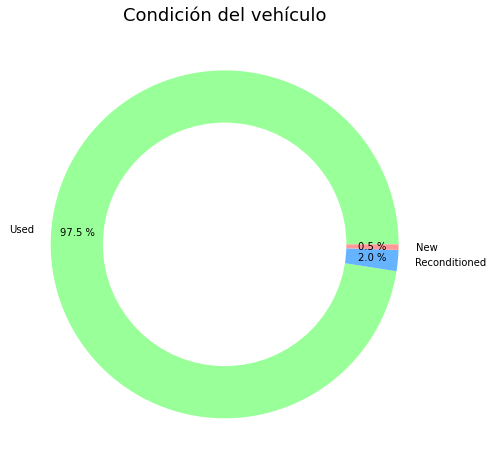

In [25]:
# Configuración de colores
# colores = ["#60D394","#AAF683","#FFD97D"]
colores = ['#99ff99','#66b3ff','#ff9999']#,'#ffcc99']
# Gráfico de pastel en base al estado del vehículo
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(vehicles['Condition'].value_counts(),labels=vehicles['Condition'].unique(),autopct="%0.1f %%",pctdistance=0.85,colors=colores)
ax.set_title( "Condición del vehículo" , size = 18 ) 
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Como se puede observar, el 97.5% de las ofertas son sobre vehículos usados, por ende establecer un estimado del precio de un vehículo usado en base a estos datos será plausible; esto, a su vez, será un indicativo de que la marca más ofertada en este datset se corresponderá con la marca más usada en Sri Lanka.

###Visualizaciones-Resultados

Visualizaciones empleando gráficos convenientes para contestar las preguntas así como su respectivo análisis y recomendaciones.

###Preguntas

####¿Qué marca de vehículo está más presente en el mercado?

Para poder contestar esta pregunta se desarrollará un Top 10 de las marcas con mayor frecuencia en el sitio, con lo cual se podrá determinar las 

In [26]:
# Se extraen las marcas en un listado
lista=vehicles['Brand']
# Se determinan las distintas marcas con su respectiva frecuencia en dos numpy array
(marcas, cuenta) = np.unique(lista, return_counts=True)
# Se concatenan ambos array para crear una tabla
tabla = np.column_stack((marcas, cuenta))
# Se ordena la tabla en orden descendente
tabla = tabla[tabla[:, 1].argsort()[::-1]]

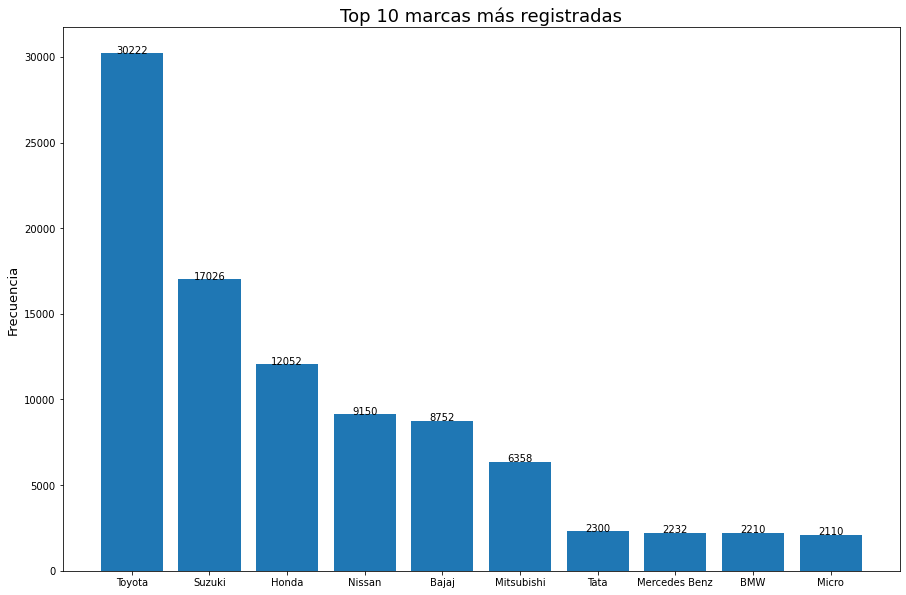

In [27]:
# Se grafican las 10 marcas con mayor frecuencia registrada en un gráfico de barras
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(tabla[0:10,0],tabla[0:10,1])  # Como la tabla esta en orden descendente se toman los 10 primeros elementos para graficar en la tabla obteniendo así el Top 10
for i in range(10):
  ax.text(i, tabla[i,1],tabla[i,1], ha = 'center') # Se indican las frecuencias en la gráfica
ax.set_ylabel( "Frecuencia" , size = 13 ) 
ax.set_title( "Top 10 marcas más registradas" , size = 18 ) 
plt.show()

Como resultado del gráfico de barras, se ha determinado que las marcas más ofertadas son Toyota y Suzuki, siendo estas con la mayor frecuencia registrada. A continuación se presenta una tabla con el resumen de las marcas y sus frecuencias:

| Marca | Frecuencia |
| ----- | --- |
| Toyota | 30222 |
| Suzuki | 17026 |
| Honda | 12052 |
| Nissan | 9150 |
| Bajaj | 8752 |
| Mitsubishi | 6358 |
| Tata | 2300 |
| Mercedez Benz | 2232 |
| BMW | 2210 |
| Micro | 2110 |

Por lo que en respuesta a la pregunta la marca más presente en el mercado es la marca **Toyota**.

####De la marca con mayor influencia en el mercado: ¿cuáles son sus modelos de vehículo con mayor oferta?

Para esta pregunta se tomará de referencia la respuesta de la pregunta anterior, siendo **Toyota** la marca más ofertada, se procederá a buscar cuales son los modelos de esta marca con mayor presencia en el mercado de Sri Lanka. 
\
\
Se procederá a determinar un Top 5 de los modelos en base a la frecuencia en que aparecen en el sitio.

In [28]:
# Se extraen los modelos en una lista, filtrados por la marca Toyota
Modelos=vehicles[vehicles['Brand']=='Toyota']['Model']
# Se determinan llos modelos con su respectiva frecuencia en dos numpy array
(modelo, cantidad) = np.unique(Modelos, return_counts=True)
# Se crea una tabla concatenan ambos array
tabla2 = np.column_stack((modelo, cantidad))
# Se ordena la tabla en orden descendente
tabla2 = tabla2[tabla2[:, 1].argsort()[::-1]]

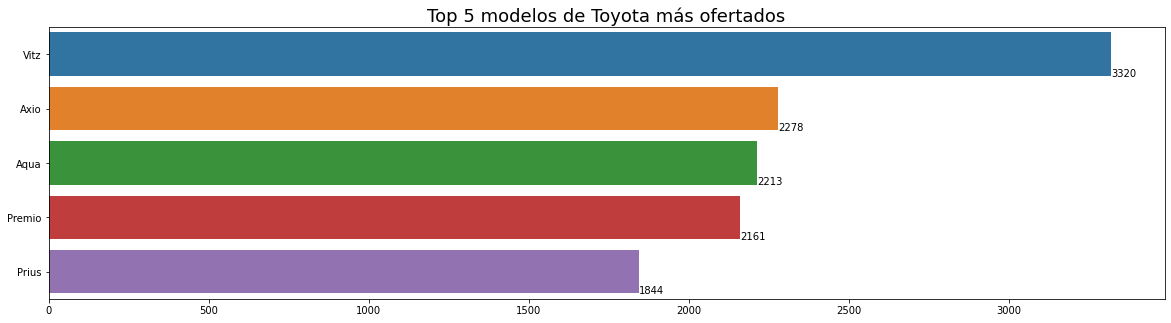

In [29]:
# Se grafican los modelos de la marca toyota con su respectiva frecuencia
fig, axes = plt.subplots(figsize=(20,5))
p=sns.barplot(x=tabla2[0:5,1], y=tabla2[0:5,0])
# Se grafican las 10 marcas con mayor frecuencia registrada en un gráfico de barras
# fig, ax = plt.subplots(figsize=(15,10))
# ax.bar(tabla[0:10,0],tabla[0:10,1])  # Como la tabla esta en orden descendente se toman los 10 primeros elementos para graficar en la tabla obteniendo así el Top 10
for pr in p.patches:
    _x = pr.get_x() + pr.get_width() + float(0.4)
    _y = pr.get_y() + pr.get_height()
    value = int(pr.get_width())
    p.text(_x, _y, value, ha="left")
p.set_title( "Top 5 modelos de Toyota más ofertados" , size = 18 ) 
plt.show()

| Modelo | Frecuencia |
| ----- | --- |
| Vitz | 3320 |
| Axio | 2278 |
| Aqua | 2213 |
| Premio | 2161 |
| Prius | 1844 |

De los modelos registrados, en la marca Toyota, la que tiene mayor (notable) oferta es el **Toyota Vitz**.

###Hipótesis

####Entre más reciente el vehículo más elevado el precio.

Para el análisis de los precios solo se considerarán vehículos del año 2000 en delante, por lo que se filtrarán los datos por año, así como se tomará en consideración que los datos fueron registrados en el año 2021.
\
\
Para este caso se procedera a crear un diagrama de caja para analizar el valor de la media en los precios cada 6 años, dado que las marcas de renombre (y las de mayor trayectoria) suelen actualizar sus vehículos entre 5 a 7 años.

In [30]:
def rango(value):
    if value < 2006:
        return "2000-2005"
    elif 2006 <= value < 2012:
        return "2006-2011"
    elif 2012 <= value < 2018:
        return "2012-2017"
    elif 2018 <= value:
        return "2018-2022"

In [31]:
Year_Price=vehicles.copy()
Year_Price=Year_Price.drop(Year_Price[Year_Price['Year']<2000].index)
Year_Price['Year Range'] = Year_Price['Year'].map(rango)

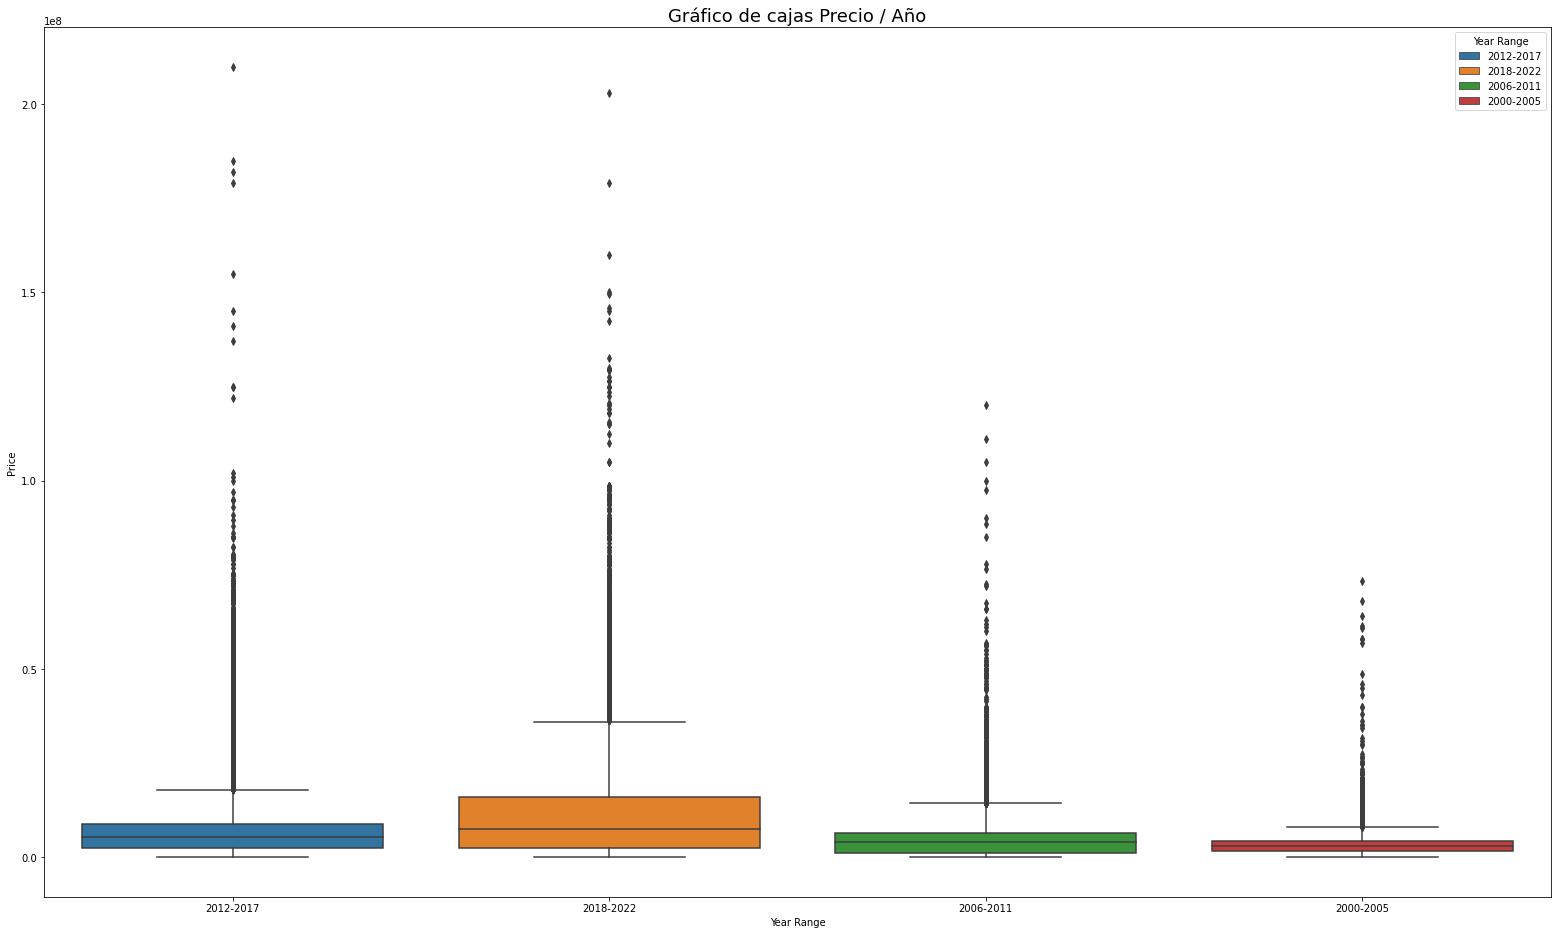

In [32]:
fig, ax = plt.subplots(figsize=(27,16))
box_plot=sns.boxplot(data=Year_Price, x="Year Range", y="Price", hue="Year Range", dodge=False)
box_plot.set_title( "Gráfico de cajas Precio / Año" , size = 18 ) 
plt.show()

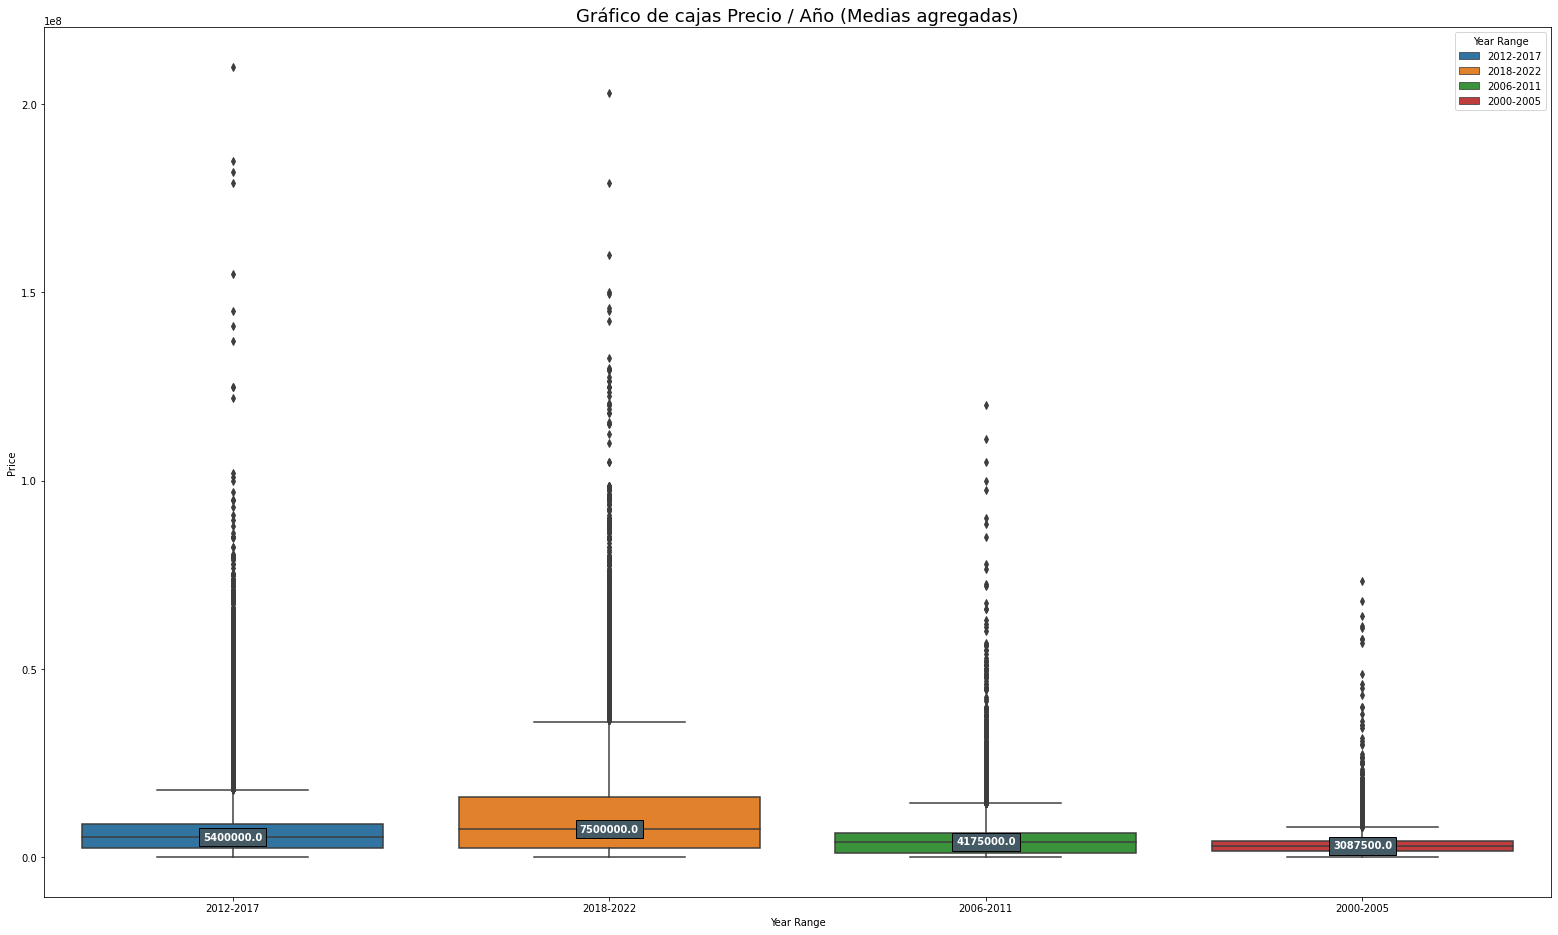

In [33]:
# Gráfica anterior pero indicando las medianas
fig, ax = plt.subplots(figsize=(27,16))
box_plot=sns.boxplot(data=Year_Price, x="Year Range", y="Price", hue="Year Range", dodge=False)
categories = ax.get_xticks()
lines = ax.get_lines()
for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold', size=10,color='white',bbox=dict(facecolor='#445A64'))
box_plot.set_title( "Gráfico de cajas Precio / Año (Medias agregadas)" , size = 18 ) 
plt.show()

Como se puede observar, a medida incrementan los años la mediana de los precios en los vehículos incrementa (así como la concentración de los datos) siendo que entre más reciente el vehículo mayor es el precio que se oferta.

| Año | Media |
| ----- | --- |
| 2000-2005 | 3.0875x10<sup>6</sup> |
| 2006-2011 | 4.175x10<sup>6</sup> |
| 2012-2017 | 5.4x10<sup>6</sup> |
| 2018-2022 | 7.5x10<sup>6</sup> |

Por ende se comprueba la hipótesis de que *entre más reciente el vehículo más elevado será el precio*.

####El tipo de vehículo sedán es el más ofertado.

Como se vió anteriormente en el Top 5 de modelos más ofertados de la marca Toyota, se puede creer que el tipo de vehículo más ofertado es el tipo sedán, para esto se procederá a crear un Top 10 de los modelos más ofertados en el sitio así como su respectiva marca para poder identificar los vehículos de forma precisa.

In [34]:
Tipos = pd.concat([vehicles['Brand'],vehicles['Model']], axis=1)
Tipos['Union']=Tipos['Brand'].str.cat(' : '+Tipos['Model'])
(tipo, numero) = np.unique(Tipos['Union'], return_counts=True)
tabla10 = np.column_stack((tipo, numero))
tabla10 = tabla10[tabla10[:, 1].argsort()[::-1]]

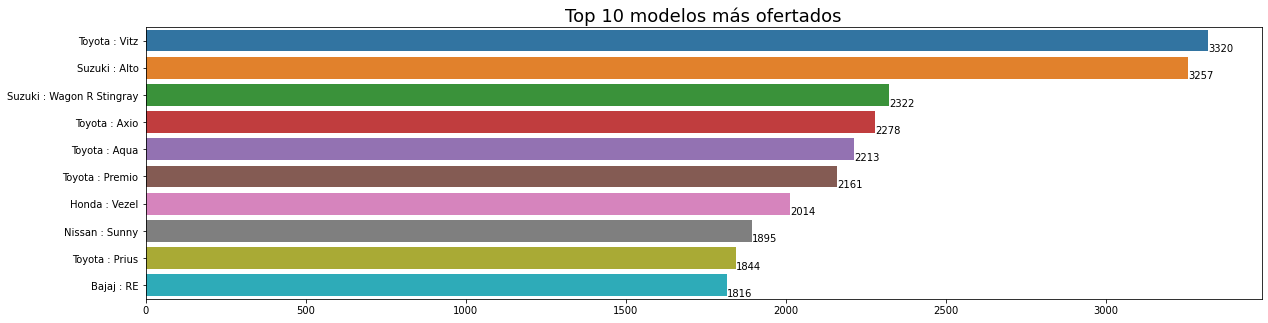

In [35]:
# Se grafican los modelos y la marca con su respectiva frecuencia
fig, axes = plt.subplots(figsize=(20,5))
f=sns.barplot(x=tabla10[0:10,1], y=tabla10[0:10,0])
for pr in f.patches:
    _x = pr.get_x() + pr.get_width() + float(0.4)
    _y = pr.get_y() + pr.get_height()
    value = int(pr.get_width())
    f.text(_x, _y, value, ha="left")
f.set_title( "Top 10 modelos más ofertados" , size = 18 ) 
sns.set_style("darkgrid")
plt.show()

El siguiente es un resumen de los modelos, con su respectiva marca y frecuencia

| Marca  | Modelo           | Frecuencia |
| -----  | -----            | ---        |
| Toyota | Vitz             | 3320       |
| Suzuki | Alto             | 3257       |
| Suzuki | Wagon R Stingray | 2322       |
| Toyota | Axio             | 2278       |
| Toyota | Aqua             | 2213       |
| Toyota | Premio           | 2161       |
| Honda  | Vezel            | 2014       |
| Nissan | Sunny            | 1895       |
| Toyota | Prius            | 1844       |
| Bajaj  | Re               | 1816       |

Clasificando los vehículos por tipo:

| Tipo  | Vehículos  | Total |
| -----  | -----  | -----            |
| Subcompactos  | Toyota: Vitz; Suzuki: Alto; Suzuki: Wagon R Stingray; Toyota: Aqua | 11112       |
| Sedán | Toyota: Axio; Toyota: Premio; Nissan: Sunny; Toyota: Prius | 8178 |
| Crossover | Honda: Vezel  | 2014       |
| Moto | Bajaj: Re          | 1816       |

De esto se podría concluir que la hipótesis es falsa, puesto que el tipo de vehículo con mayor cantidad de ofertas es el tipo subcompacto mientras que el tipo sedán es el segundo más ofertado.
\
\
Ahora bien, puede ser que en el análisis dado no sea determinante para decir que el sedán no es el tipo de vehículo más ofertado, puesto que aun faltan cerca de 95320 registros más, pero se puede observar una tendecia, por lo que la hipótesis podría modificarse a que: "el tipo de vehículo sedán es uno de los más ofertados", lo cual sería una afirmación más acertada.
\
\
Con lo anterior se podría indicar que el vehículo tipo sedán es uno de los más usados en la región de Sri Lanka.

##Recomendaciones

Como recomendaciones se pueden dar las siguientes:

- Si se quiere vender o compar un vehículo los tipos subcompácto, sedán o crossover son los más usados en Sri Lanka, por lo que es conveniente revisar este tipo de vehículos.
- Al comprar o vender un vehículo, es mejor que sea de la marca Toyota o Suzuki, puesto que son de las marcas de mayor "confianza" o interes en Sri Lanka.


#Feature Selection - Resumen


Antes de proceder con el feature selection, primero se reestructura el dataset.

* Como ```Location``` no es consistente, puesto que hay ubicaciones que, si bien son la misma, no estan escritas de la misma forma, por lo que puede generar ciertas complicaciones por lo que para esta ocación se ha considerado el omitirlo del dataset.
* Para aplicar un target encode a las columnas de ```Brand``` y ```Model``` se procede a crear una columna que contenga la unión de estas dos.
* Previamente en el gráfico de pastel del estado de los autos, en el EDA, se puede observar que el 97.5% de los autos son usados, por lo que es mejor omitirlo dado que no afectara significativamente en el algoritmo.

Una vez reestructurado el dataset se procede a evaluar cuales columnas o variables de las restantes tienen una mayor significancia o impacto en la determinación del precio de oferta de un vehículo

Para este caso se puede observar que la columna ```Marca-Modelo``` tiene la ayor significancia a la hora de determinar el precio.

Una vez hecho esto, se determina que para entrenar el modelo se seleccionarán estas 3 columnas para el dataset. 

Ante de proseguir se procederá a hacer una normalización de los datos


In [36]:
vehicles1

,Price,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Marca-Modelo
0,12900000.0,8.310721e+06,2017,6.343023e+06,7.867140e+06,1.792283e+07,8.078657e+06,8.501474e+06,8.959310e+06,4.197390e+06,9.162514e+06
1,16250000.0,1.482306e+07,2013,6.343023e+06,7.867140e+06,8.772342e+06,8.539066e+06,1.636105e+07,9.200867e+06,4.197390e+06,1.196348e+07
2,17000000.0,7.970764e+06,2020,6.343023e+06,7.867140e+06,1.792283e+07,5.690901e+06,9.113068e+06,1.055596e+07,1.064187e+07,1.342174e+07
3,13000000.0,1.100885e+07,2017,6.343023e+06,7.867140e+06,1.792283e+07,5.690901e+06,9.113068e+06,9.926973e+06,1.064187e+07,1.342174e+07
4,33500000.0,1.059501e+07,2015,6.343023e+06,7.867140e+06,1.792283e+07,5.690901e+06,2.395681e+07,7.732163e+06,6.704853e+06,2.739242e+07
...,...,...,...,...,...,...,...,...,...,...,...
123966,6500000.0,4.163228e+06,2012,6.343023e+06,7.867140e+06,5.059449e+06,8.078657e+06,6.805618e+06,6.650046e+06,4.560452e+06,6.256171e+06
123967,5850000.0,4.163228e+06,2011,9.247688e+06,2.363669e+06,3.435150e+06,8.539066e+06,5.509590e+06,3.326028e+06,1.064187e+07,6.442001e+06
123968,480000.0,4.163228e+06,2017,6.343023e+06,2.363669e+06,7.419948e+05,5.690901e+06,2.129430e+05,9.513681e+06,1.064187e+07,7.240974e+05
123969,6975000.0,4.163228e+06,2018,6.343023e+06,7.867140e+06,5.059449e+06,5.690901e+06,4.885112e+06,9.228290e+06,3.284240e+06,6.474158e+06


In [37]:
from sklearn.preprocessing import scale
from pandas import DataFrame

veh = DataFrame(scale(vehicles1[["Price","Marca-Modelo", "Edition", "Capacity", "Mileage", "Body", "Year"]]), index=vehicles1[["Price","Marca-Modelo", "Edition", "Capacity", "Mileage", "Body", "Year"]].index, columns=vehicles1[["Price","Marca-Modelo", "Edition", "Capacity", "Mileage", "Body", "Year"]].columns)

##Algoritmo y Entrenamiento

El algoritmo a emplear será un algoritmo de regresión lineal, dado que los datos son de tipo continuo.

Primero se procede a seccionar el dataset en 2 partes, datos para entrenamiento y datos para prueba:

In [38]:
x=veh.drop(['Price'], axis=1) # Contiene las variables predictivas o empleadas para determinar el precio de un vehículo
y=veh['Price']                # Contiene la variable que se quiere predecir
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42) # El 75% de los datos se empleanrán para entrenar el modelo mientras que un 25% se usará para el test

Con la partición de los datos en estos dos conjuntos se procede a crear el modelo con el algoritmo de regresión lineal para entrenarlo  tratar de predecir los precios en base a las variables predictivas.

In [39]:
model=LinearRegression() # Se emplea un algoritmo de regresión lineal puesto que se trabaja con valores numericos discretos
model.fit(x_train,y_train) # Se ejecuta el modelo con los datos de entrenamiento
y_pred = model.predict(x_test) # Resultado de precios esperados según los valores predictivos del conjunto de prueba

Con esto se ha terminado de evaluar el modelo de regresión lineal con los datos de prueba, ahora se procedera a examinar las métricas para conocer que tan bueno o acertado ha sido el modelo entrenado.

##Métricas

Dado que se empleo una regresión lineal se procederá a calcular:
* MAE
* MSE
* RMSE 
* R<sup>2</sup>

El promedio de la diferencia absoluta es "relativamente bajo" dado que estamos hablando de rupias indias

###MAE

In [40]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2356030305033317


###MSE

In [41]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.26295418450232555


###RMSE

In [42]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.5127905854267661


In [43]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE -0.6678877326963801


###R<sup>2</sup>

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.7272000511580752


##Conclusiones - Evaluando modelos ML

Como se puede observar, el modelo tiene una precisión de aproximadamente de 0.73, esto indica que el modelo ha realizado una predicción aceptable de los datos. Además que una regresión es el que mejor se ajusta para este caso por tratarse de valores continuos y no emplearse categorías en el objetivo.

De las métricas se puede considerar que el modelo es en cierta forma adecuado para la predicción de los valores, pero aun hay forma de mejorar, dado que un 72.9% podría considerarse una precisión baja.

El modelo como tal no presenta problemas de overfitting, esto por el valor de precisión registrado.

Pueden presentarse problemas de underfitting por el "bajo" grado de precisión alcanzado (si bien es alto, podría ser mejor), dada la simplicidad del modelo, deberían ajustarse mejor los parametros del modelo pero se ha conseguido un resultado más exacto dada la parte de "Limpieza previa del Dataset", gracias al Feature Selection.

#Storytelling
La venta y compra de autos es algo de interés común en la gente dado los beneficios de tener un auto así como las necesidades que a veces surgen por lo que la gente quiere vender su auto para cubrir dichas necesidades.

Para iniciar hacemos constatar que la información a usar será de beneficio para la población dado que se basa en un dataset del cual el 97.5% es información sobre vehículos usados.

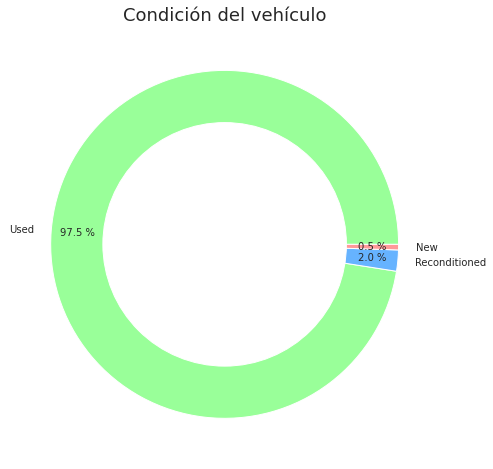

In [45]:
#@title
# # Configuración de colores
# colores = ["#60D394","#AAF683","#FFD97D"]
# # Gráfico de pastel en base al estado del vehículo
# fig, ax = plt.subplots(figsize=(8,8))
# ax.pie(vehicles['Condition'].value_counts(),labels=vehicles['Condition'].unique(),autopct="%0.1f %%", colors=colores)
# ax.set_title( "Condición del vehículo" , size = 18 ) 
# plt.show()
# Configuración de colores
# colores = ["#60D394","#AAF683","#FFD97D"]
colores = ['#99ff99','#66b3ff','#ff9999']#,'#ffcc99']
# Gráfico de pastel en base al estado del vehículo
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(vehicles['Condition'].value_counts(),labels=vehicles['Condition'].unique(),autopct="%0.1f %%",pctdistance=0.85,colors=colores)
ax.set_title( "Condición del vehículo" , size = 18 ) 
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##Top Marcas más solicitadas

En Sri Lanka hay una grán influencia por parte de ciertas marcas, entre ellas se puede observar que entre las márcas más usadas (o vendidas) es la marca toyota.

A continuación se presenta el top 10 de las marcas con mayor registro en el sitio:

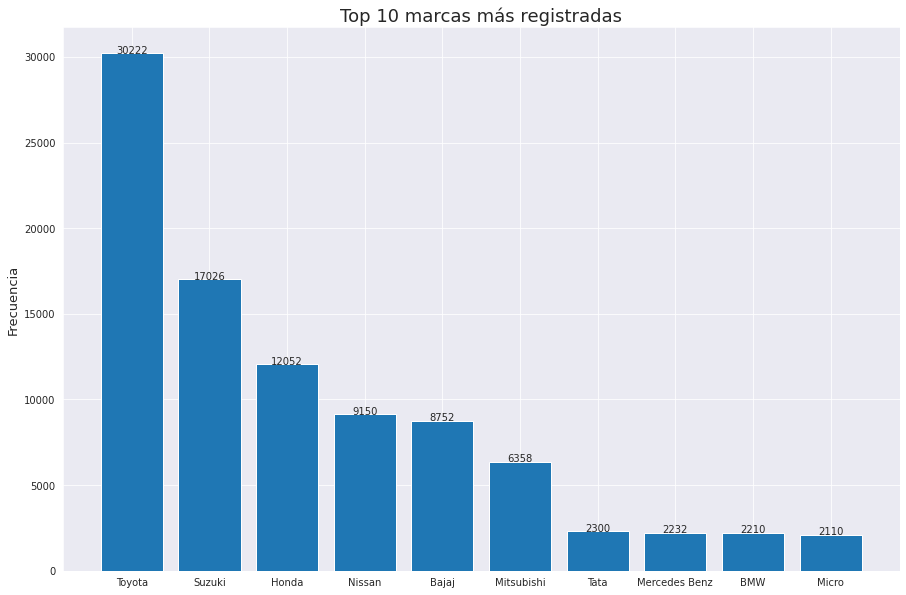

In [46]:
#@title
# Se grafican las 10 marcas con mayor frecuencia registrada en un gráfico de barras
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(tabla[0:10,0],tabla[0:10,1])  # Como la tabla esta en orden descendente se toman los 10 primeros elementos para graficar en la tabla obteniendo así el Top 10
for i in range(10):
  ax.text(i, tabla[i,1],tabla[i,1], ha = 'center') # Se indican las frecuencias en la gráfica
ax.set_ylabel( "Frecuencia" , size = 13 ) 
ax.set_title( "Top 10 marcas más registradas" , size = 18 ) 
plt.show()

La marca toyota parece ser la predilecta por parte de los habitantes de Sri Lanka, siendo poco probable que sufra un desplazamiento; o al menos eso pareciera con este análisis, pero observemos la frecuencia de las marcas por año

In [ ]:
#@title
Marc=vehicles[['Year','Brand']]
Marc['Year Range'] = Marc['Year'].map(rango)

In [48]:
#@title
(tipo, cantidad) = np.unique(Marc['Brand'][Marc['Year Range']=="2000-2005"], return_counts=True)
Marca1 = np.column_stack((tipo, cantidad))
Marca1 =pd. DataFrame(Marca1, columns=['Marca', 'Frecuencia'])
Marca1 = Marca1.sort_values(['Frecuencia'], ascending = False).reset_index(drop=True)
Marca1.style.set_caption('2000-2005')
Marca1.head(10).style.background_gradient(cmap='Reds', subset = ['Frecuencia']).set_caption('2000-2005')

,Marca,Frecuencia
0,Toyota,8125
1,Nissan,6576
2,Mitsubishi,3798
3,Suzuki,1799
4,Bajaj,1751
5,Honda,1732
6,Mazda,1030
7,Isuzu,986
8,Hyundai,633
9,Daihatsu,568


In [49]:
#@title
(tipo, cantidad) = np.unique(Marc['Brand'][Marc['Year Range']=="2006-2011"], return_counts=True)
Marca2 = np.column_stack((tipo, cantidad))
Marca2 =pd. DataFrame(Marca2, columns=['Marca', 'Frecuencia'])
Marca2 = Marca2.sort_values(['Frecuencia'], ascending = False).reset_index(drop=True)
Marca2.head(10).style.background_gradient(cmap='Reds', subset = ['Frecuencia']).set_caption('2006-2011')

,Marca,Frecuencia
0,Toyota,6261
1,Bajaj,2893
2,Suzuki,2335
3,Honda,1175
4,Nissan,972
5,Mitsubishi,775
6,Tata,735
7,TVS,502
8,Micro,500
9,Perodua,408


In [50]:
#@title
(tipo, cantidad) = np.unique(Marc['Brand'][Marc['Year Range']=="2012-2017"], return_counts=True)
Marca3 = np.column_stack((tipo, cantidad))
Marca3 =pd. DataFrame(Marca3, columns=['Marca', 'Frecuencia'])
Marca3 = Marca3.sort_values(['Frecuencia'], ascending = False).reset_index(drop=True)
Marca3.head(10).style.background_gradient(cmap='Reds', subset = ['Frecuencia']).set_caption('2012-2017')

,Marca,Frecuencia
0,Toyota,12283
1,Suzuki,9683
2,Honda,6834
3,Bajaj,3432
4,Micro,1483
5,Nissan,1440
6,Mitsubishi,1392
7,BMW,1357
8,Tata,1217
9,Mercedes Benz,919


In [51]:
#@title
(tipo, cantidad) = np.unique(Marc['Brand'][Marc['Year Range']=="2018-2022"], return_counts=True)
Marca4 = np.column_stack((tipo, cantidad))
Marca4 =pd. DataFrame(Marca4, columns=['Rango - Marca', 'Frecuencia'])
Marca4 = Marca4.sort_values(['Frecuencia'], ascending = False).reset_index(drop=True)
Marca4.head(10).style.background_gradient(cmap='Reds', subset = ['Frecuencia']).set_caption('2018-2022')

,Rango - Marca,Frecuencia
0,Toyota,3553
1,Suzuki,3209
2,Honda,2311
3,Yamaha,920
4,Mercedes Benz,737
5,Bajaj,676
6,Land Rover,536
7,Audi,500
8,TVS,490
9,BMW,467


Observando las tablas puede concluirse que la marca Toyota puede llegar a ser desplazada.

La marca Suzuki a incrementado su prominencia dentro del mercado de Sri Lanka, llegando a desplazar marcas como Nissan y Honda en años previos y posiblemente a Toyota en un futuro cercano dado que la diferencia entre ellos se ha reducido considerablemente con el paso de los años.

##¿Qué regiones poseen mayor oferta de vehículos?

En el año de 2021 el distrito de Colombo demostró ser la región con mayor actividad comercial dentro del sitio en la venta de vehículos usados.

Esta claro poder decir que el distrito de Colombo es uno en el que hay mayor uso o necesidad de un vehículo para el transporte.

Puesto que hay una mayor cantidad de ofertas registradas en este distrito indica que hay una mayor cantidad de usuarios de automoviles en esta región.

In [52]:
#@title
Regiones=vehicles['Location']
(tipo, cantidad) = np.unique(Regiones, return_counts=True)
Regiones = np.column_stack((tipo, cantidad))
Region=pd. DataFrame(Regiones, columns=['Distritos', 'Frecuencia'])
Region = Region.sort_values(['Frecuencia'], ascending = False).reset_index(drop=True)
Region.head(10).style.background_gradient(cmap='Blues', subset = ['Frecuencia'])

,Distritos,Frecuencia
0,Colombo,35944
1,Gampaha,15507
2,Kurunegala,7210
3,Kandy,6518
4,Matara,4508
5,Kalutara,3887
6,Galle,3879
7,Kegalle,2438
8,Ratnapura,1951
9,Puttalam,1718


##¿Qué tipos de vehículos son los más vendidos?

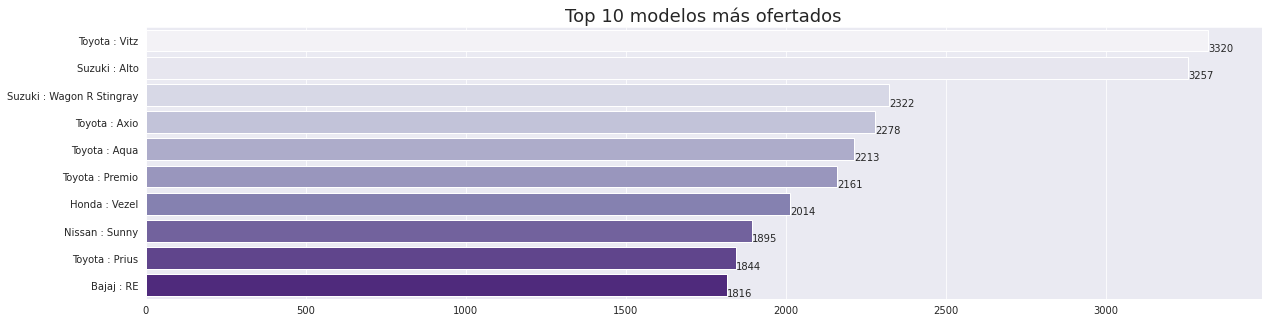

In [53]:
#@title
Tipos = pd.concat([vehicles['Brand'],vehicles['Model']], axis=1)
Tipos['Union']=Tipos['Brand'].str.cat(' : '+Tipos['Model'])
(tipo, numero) = np.unique(Tipos['Union'], return_counts=True)
tabla10 = np.column_stack((tipo, numero))
tabla10 = tabla10[tabla10[:, 1].argsort()[::-1]]
fig, axes = plt.subplots(figsize=(20,5))
f=sns.barplot(x=tabla10[0:10,1], y=tabla10[0:10,0],palette="Purples")
for pr in f.patches:
    _x = pr.get_x() + pr.get_width() + float(0.4)
    _y = pr.get_y() + pr.get_height()
    value = int(pr.get_width())
    f.text(_x, _y, value, ha="left")
f.set_title( "Top 10 modelos más ofertados" , size = 18 ) 
plt.show()

Entre los modelos que que más se venden se puede observar que todos ellos son de tipo subcompacto, lo cual es razonable en algunos casos por el precio accesible que poseen.

| Tipo  | Vehículos  | Total |
| -----  | -----  | -----            |
| Subcompactos  | Toyota: Vitz; Suzuki: Alto; Suzuki: Wagon R Stingray; Toyota: Aqua | 11112       |
| Sedán | Toyota: Axio; Toyota: Premio; Nissan: Sunny; Toyota: Prius | 8178 |
| Crossover | Honda: Vezel  | 2014       |
| Moto | Bajaj: Re          | 1816       |

##Top 5 Modelos de las marcas más vendidas

Con Toyota siendo la marca más vendida en todos estos años observemos qué modelo ha sido el más ofertado o que la gente a preferido

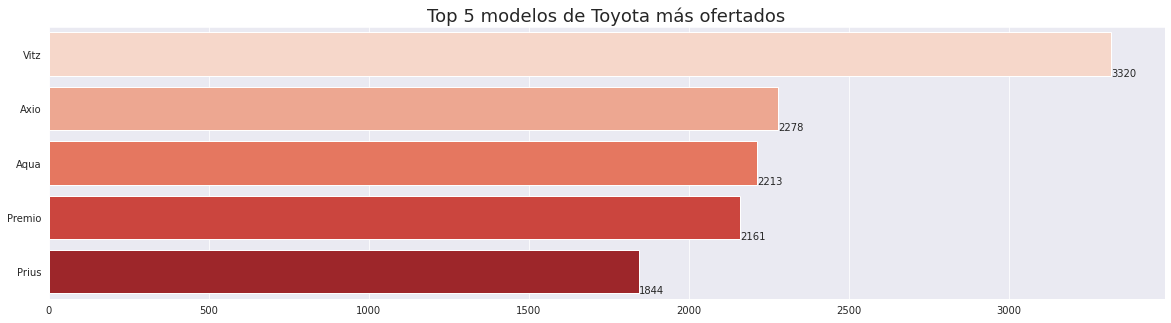

In [54]:
#@title
Modelos=vehicles[vehicles['Brand']=='Toyota']['Model']
(modelo, cantidad) = np.unique(Modelos, return_counts=True)
tabla2 = np.column_stack((modelo, cantidad))
tabla2 = tabla2[tabla2[:, 1].argsort()[::-1]]
fig, axes = plt.subplots(figsize=(20,5))
p=sns.barplot(x=tabla2[0:5,1], y=tabla2[0:5,0],palette="Reds")
for pr in p.patches:
    _x = pr.get_x() + pr.get_width() + float(0.4)
    _y = pr.get_y() + pr.get_height()
    value = int(pr.get_width())
    p.text(_x, _y, value, ha="left")
p.set_title( "Top 5 modelos de Toyota más ofertados" , size = 18 ) 
plt.show()

Entre los modelos más vendidos por Toyota se pueden observar una gran cantidad de vehículos tipo sedan, esto puede ser un indicio de porqué en los últimos años las ventas de vehículos de toyota han disminuido y las de Suzuki han aumentado.

Observando el Top 5 de la marca Suzuki:

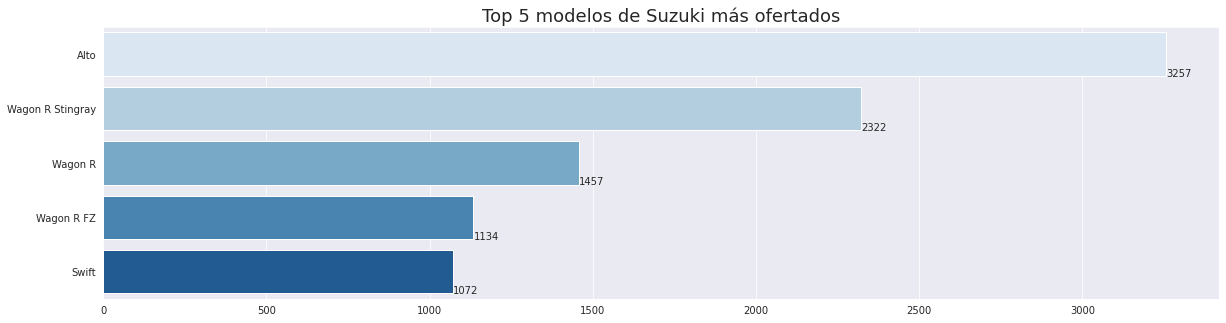

In [55]:
#@title
Modelos=vehicles[vehicles['Brand']=='Suzuki']['Model']
(modelo, cantidad) = np.unique(Modelos, return_counts=True)
tabla2 = np.column_stack((modelo, cantidad))
tabla2 = tabla2[tabla2[:, 1].argsort()[::-1]]
cols = ['grey' if (x < max(tabla2[:, 1])) else 'darkorange' for x in tabla2[:, 1]]
fig, axes = plt.subplots(figsize=(20,5))
p=sns.barplot(x=tabla2[0:5,1], y=tabla2[0:5,0],palette="Blues")
for pr in p.patches:
    _x = pr.get_x() + pr.get_width() + float(0.4)
    _y = pr.get_y() + pr.get_height()
    value = int(pr.get_width())
    p.text(_x, _y, value, ha="left")
p.set_title( "Top 5 modelos de Suzuki más ofertados" , size = 18 ) 
plt.show()

La marca Suzuki concuerda en que el top 5 está conformado por varios vehículos tipo subcompacto.

Se puede llegar a pensar que en Sri Lanka se relaciona más un vehículo tipo sedán con la marca Toyota y un vehículo tipo subcompacto con la marca Suzuki, por lo que al haber un mayor flujo en el mercado de vehículos tipo subcompacto se ha llegado a una mayor inclinación por la marca Suzuki en el transcurso de los años.

##¿Qué precios de son manejados entre los vehículos ofertados?

Se puede corroborar que entre más reciente el vehículo mayor será el precio al que se pueda vender.

Esto se puede ver en el valor promedio del precio de rupias por año.

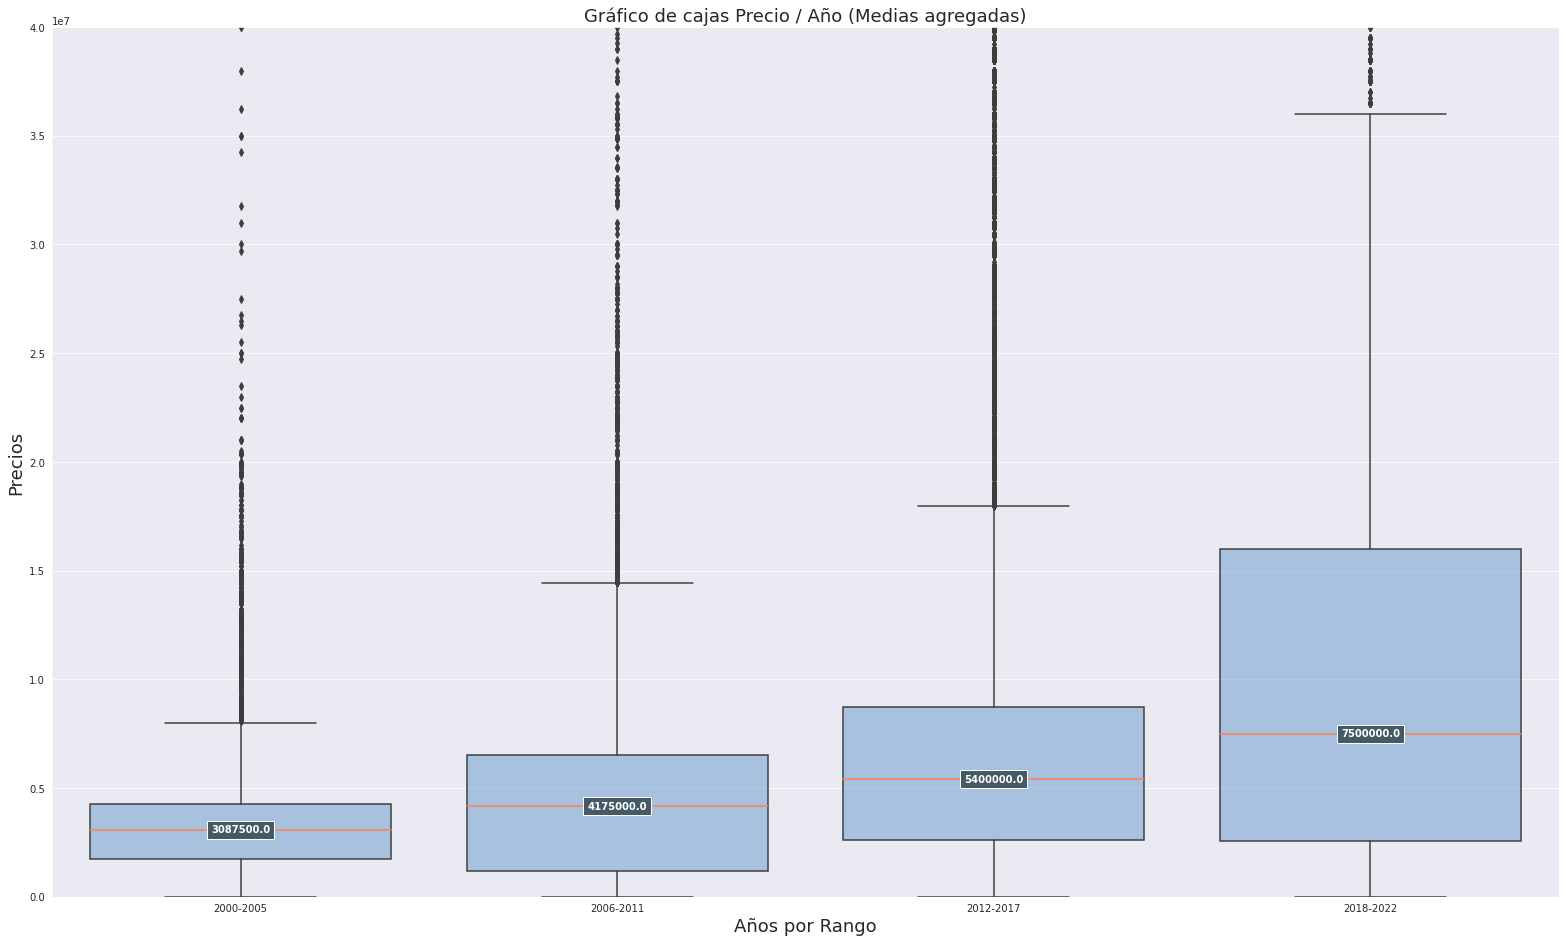

In [56]:
#@title
Year_Price=vehicles.copy()
Year_Price=Year_Price.drop(Year_Price[Year_Price['Year']<2000].index)
Year_Price['Year Range'] = Year_Price['Year'].map(rango)
fig, ax = plt.subplots(figsize=(27,16))
box_plot=sns.boxplot(data=Year_Price, x="Year Range", y="Price", order=["2000-2005","2006-2011","2012-2017","2018-2022"],dodge=False,medianprops={"color": "coral"},boxprops={"facecolor": (.4, .6, .8, .5)})#,notch=True)
categories = ax.get_xticks()
lines = ax.get_lines()
for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold', size=10,color='white',bbox=dict(facecolor='#445A64'))
box_plot.set_title( "Gráfico de cajas Precio / Año (Medias agregadas)" , size = 18 ) 
ax.set(ylim=(0, 40000000))
ax.set_xlabel("Años por Rango",fontsize = 18)
ax.set_ylabel("Precios",fontsize = 18)
plt.show()

Insights

* Entre las regiones de mayor movimiento comercial está el distrito de Colombo.
* Toyota y Suzuki son marcas que a través de los años han sido de gran impacto  dentro del mercado de Sri Lanka.
* Suzuki es una marca más orientada a distribución de vehículos tipo subcompactos en Sri Lanka por lo que ha recibido un notable crecimiento en los últimos años.
* Entre más reciente reciente el vehículo mayor será el precio de oferta, pero * puede que sea más complicado realizar la transacción

Recomendaciones
* Si se quiere ofertar un vehículo es mejor que sea en regiones como Colombo o Gampaha dado que poseen mayor actividad comercial lo cual genera una mayor probabilidad de éxito en la venta.
* Para la compra o venta de vehículos debe considerarse de tipo subcompacto y sedán pues son los más usados en Sri Lanka.
* Entre las marcas de vehículos las más confiables son Toyota y Suzuki, por ello deben considerarse como prioridad estas marcas.

